# Case study on Correlation and Regression

A textile company spend money on 5 advertising company for their ads.Then to find solutions for:

1.Finding the relationship between amount spend for companies and profit generated.

2.Building a regression model for predicting the profit from given data.

3.Predict the profit generated by the company, if they spend amounts such as 290,312,309,298,320

In [ ]:
#importing the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset from excel to python
data=pd.read_csv('Add_sales_data_2018 (1).csv')

In [3]:
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4093.065
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,4042.448
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,4213.819
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,4391.665
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,14-12-2017,288.00,288.25,279.20,284.50,284.30,5374.105
201,13-12-2017,290.00,292.50,282.20,284.80,284.45,5439.655
202,12-12-2017,298.60,298.60,286.65,287.45,287.80,5545.013
203,11-12-2017,290.00,299.55,285.90,297.85,298.35,5565.444


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [7]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [9]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

# 1.Find the relationship between amount spend for advertising through five companies and profit generated!?

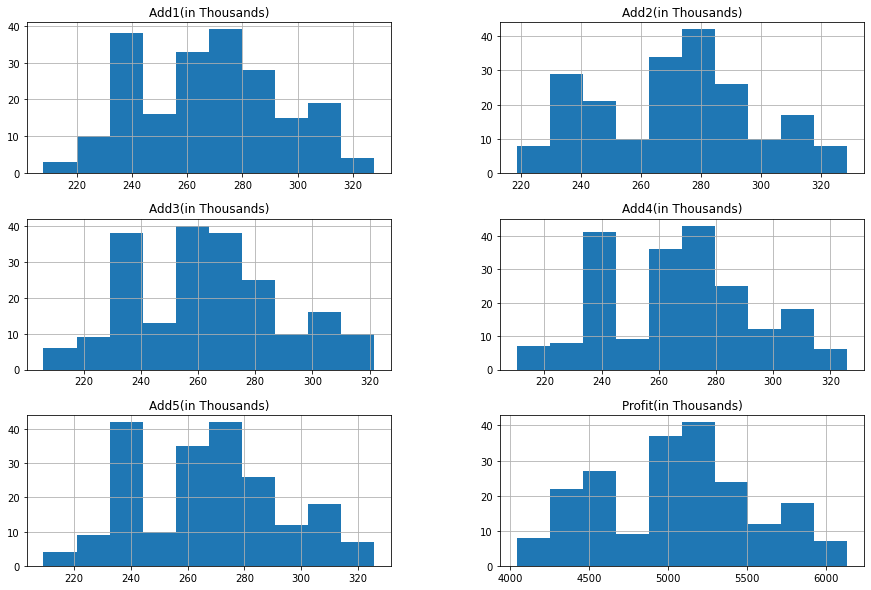

In [91]:
graph=data.select_dtypes(include=['int32','int64','float'])
graph.hist(figsize=(15,10))
plt.show()

<AxesSubplot:>

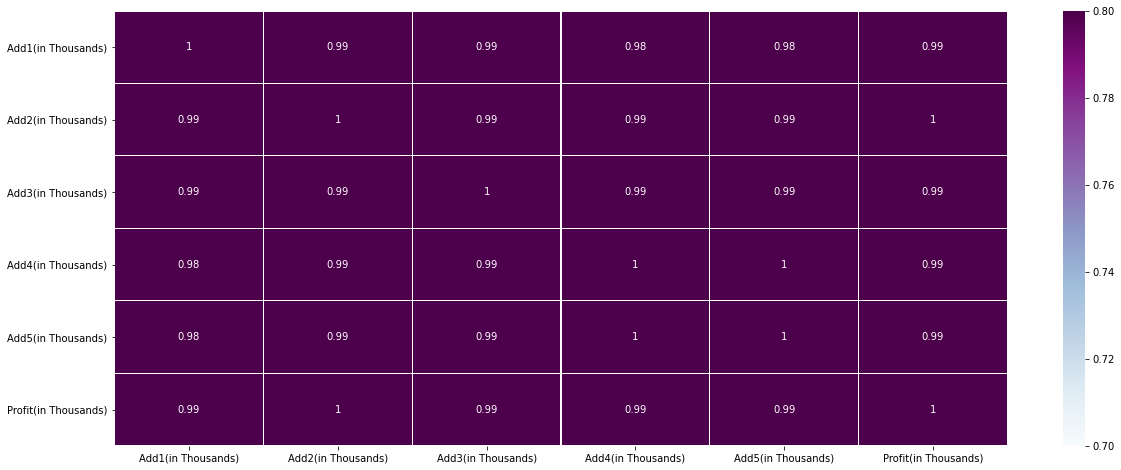

In [32]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.7,vmax=0.8,annot=True,linewidth=0.2,cmap="BuPu")

In [33]:
#dropping the add1 only because of showing minute variation in correlation.
data1=data.drop(['Add1(in Thousands)'],axis=1)
corrltn=data1.corr()

In [34]:
corrltn

,Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add2(in Thousands),1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

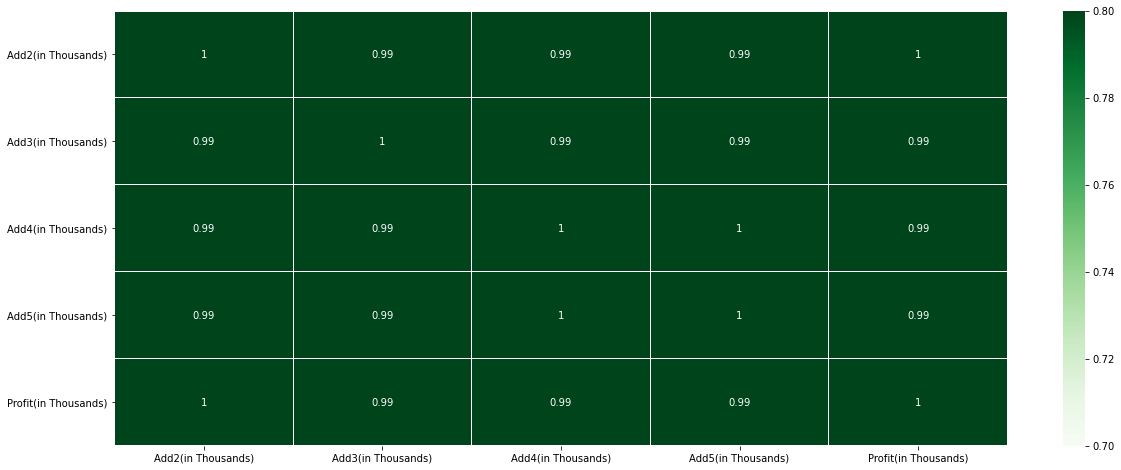

In [35]:
# heatmap of correlation of data excluding add1.
corrmatrix=data1.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.7,vmax=0.8,annot=True,linewidth=0.2,cmap="Greens")

Insight:

The heatmap shows that the data is having a  high strong corelation relation.

# 2.Build a regression model to predict the model!?

In [55]:
Y=data1['Profit(in Thousands)']
X=data1.drop(['Profit(in Thousands)','Date'],axis=1)
x.shape

(205, 2)

In [58]:
print(X)

     Add2(in Thousands)  Add3(in Thousands)  Add4(in Thousands)  \
0                222.25              206.85              216.00   
1                218.60              205.90              210.25   
2                227.80              216.15              217.25   
3                237.50              225.75              226.45   
4                234.60              221.05              230.30   
..                  ...                 ...                 ...   
200              288.25              279.20              284.50   
201              292.50              282.20              284.80   
202              298.60              286.65              287.45   
203              299.55              285.90              297.85   
204              289.90              285.05              288.05   

     Add5(in Thousands)  
0                215.15  
1                209.20  
2                218.20  
3                227.60  
4                230.90  
..                  ...  
200          

In [59]:
print(Y)

0      4093.065
1      4042.448
2      4213.819
3      4391.665
4      4350.683
         ...   
200    5374.105
201    5439.655
202    5545.013
203    5565.444
204    5421.842
Name: Profit(in Thousands), Length: 205, dtype: float64


In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=32,test_size=0.25)


In [111]:
from sklearn import linear_model
lr=linear_model.LinearRegression()


In [98]:
model=lr.fit (X_train, Y_train) 
predictions=model.predict(X_test)


In [72]:
print(Y_test)

145    5108.626
203    5565.444
121    5184.204
140    5250.150
184    5962.336
27     4453.773
93     4705.198
122    5167.878
143    5134.657
202    5545.013
191    5780.799
187    5890.012
20     4178.008
28     4416.136
39     4506.279
23     4465.950
186    5861.830
18     4190.965
102    5453.240
183    5972.337
2      4213.819
148    5190.758
17     4326.782
175    5784.540
181    5921.116
44     4648.627
150    5216.436
79     5013.207
21     4390.996
26     4451.999
130    4922.845
29     4482.183
104    5518.561
163    5267.657
87     5058.140
193    5745.806
168    5616.791
109    5577.150
161    5212.949
115    5397.739
56     4947.720
86     5015.536
46     4558.651
85     4923.127
34     4461.325
179    6137.800
118    5318.100
116    5395.217
73     4936.120
199    5425.371
114    5378.379
33     4513.600
Name: Profit(in Thousands), dtype: float64


In [73]:
print(predictions)

[5107.13788495 5564.60109177 5185.24393377 5252.59572807 5961.65690827
 4455.58672174 4706.2991344  5165.10496173 5132.24699368 5543.05080144
 5780.15228651 5891.20194517 4173.98277962 4417.10185166 4503.83140651
 4466.52013083 5858.41307037 4190.3276037  5450.61009887 5972.09203015
 4215.2832031  5191.35764839 4337.21262646 5782.21664778 5921.42810718
 4649.68726358 5218.58751937 5013.8983732  4389.14330504 4451.46706458
 4923.51454649 4479.51548738 5515.76464055 5273.39236839 5055.67609173
 5744.50876915 5613.43508259 5576.50194271 5215.23699337 5397.30104377
 4946.16238458 5011.31804173 4558.03553995 4921.20562571 4461.54446274
 6136.83681068 5317.52822534 5394.54146535 4933.03953018 5424.56492508
 5376.44109835 4515.94979022]


In [87]:
from sklearn.metrics import mean_squared_error


In [88]:
print('MSE is:\n',mean_squared_error(Y_test,predictions))

MSE is:
 6.192108734719089


Insight: 

MSE value is so far away from 0 so it cannot be determined as a good one(having higher error rate)

In [78]:
model.intercept_

-1.677769718797208

In [ ]:
#negative implies that the model is overestimating on an average y values and also line crosses below the origin.

In [85]:
model.coef_

array([13.4110556 ,  4.21787335,  1.20520819, -0.05317276])

In [82]:
X.head()

,Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,222.25,206.85,216.00,215.15
1,218.60,205.90,210.25,209.20
2,227.80,216.15,217.25,218.20
3,237.50,225.75,226.45,227.60
4,234.60,221.05,230.30,230.90


In [83]:
make_pred=[[13.4110556 ,  4.21787335,  1.20520819, -0.05317276]]
model.predict(make_pred).item()

197.42445231788776

In [93]:
model.score(X,Y)

0.9999730423299914

In [100]:
Y_pred=model.predict(X_test)

In [102]:
np.mean((Y_test-Y_pred)**2)

6.192108734719089

# 3.Predict the profit generated by the company ,if they spend amounts as 290,312,309,298,320

In [106]:
#coerelation of data includind add1,add2,add3,add4,add5 and profit
corrltn=data.corr()

In [107]:
corrltn

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


In [108]:
Y=data['Profit(in Thousands)']
X=data.drop(['Profit(in Thousands)','Date'],axis=1)
x.shape

(205, 2)

In [109]:
print(X)

     Add1(in Thousands)  Add2(in Thousands)  Add3(in Thousands)  \
0                208.00              222.25              206.85   
1                217.00              218.60              205.90   
2                223.50              227.80              216.15   
3                230.00              237.50              225.75   
4                234.55              234.60              221.05   
..                  ...                 ...                 ...   
200              288.00              288.25              279.20   
201              290.00              292.50              282.20   
202              298.60              298.60              286.65   
203              290.00              299.55              285.90   
204              287.55              289.90              285.05   

     Add4(in Thousands)  Add5(in Thousands)  
0                216.00              215.15  
1                210.25              209.20  
2                217.25              218.20  
3          

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=32,test_size=0.25)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit (X_train, Y_train) 
predictions=model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE is:\n',mean_squared_error(Y_test,predictions))

MSE is:
 9.544391683304165e-25


In [114]:
make_pred=[[290,312,309,298,320]]
model.predict(make_pred).item()

5820.060000000001

Insight:
    
The predicted profit generated by the company if they spend amounts such as 290,312,309,298,320,the total amount will be 5820.06000